In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import h5py
import matplotlib.pyplot as plt
from constants import const
import vtk_read as vtk
import get_M
import correlate as corr
import plot_correlation as pltcorr
import get_new_space as gns
import transform as tf
import plot_explained_variance_all as pev
import plot_pc_map as pltmap
import plot_pc_map_3d as pltmap3d
import plot_dendrogram as pd
import get_response as gr
import get_linkage as gl
import plot_pc_vs_poly_all as ppp
import plot_linkage_check as plc

C = const()

set_id_cal = C['set_id_cal']
strt_cal = C['strt_cal']
ns_cal = C['ns_cal']
dir_cal = C['dir_cal']
names_cal = C['names_cal']

set_id_val = C['set_id_val']
strt_val = C['strt_val']
ns_val = C['ns_val']
dir_val = C['dir_val']
names_val = C['names_val']

In [2]:
Hvec = [9]

f = h5py.File("spatial_L%s.hdf5" % C['H'], 'w')
f.close()

"""Gather data from vtk files"""
for ii in xrange(len(set_id_cal)):
    vtk.read_euler(strt_cal[ii], ns_cal[ii], set_id_cal[ii],
                   dir_cal[ii], 0)
for ii in xrange(len(set_id_val)):
    vtk.read_euler(strt_val[ii], ns_val[ii], set_id_val[ii],
                   dir_val[ii], 0)

"""Compute GSH coefficients to create microstructure function in real and
fourier space"""
for ii in xrange(len(set_id_cal)):
    get_M.get_M(ns_cal[ii], set_id_cal[ii])
for ii in xrange(len(set_id_val)):
    get_M.get_M(ns_val[ii], set_id_val[ii])

"""Compute the periodic statistics for the microstructures"""
for ii in xrange(len(set_id_cal)):
    corr.correlate(ns_cal[ii], set_id_cal[ii])
for ii in xrange(len(set_id_val)):
    corr.correlate(ns_val[ii], set_id_val[ii])

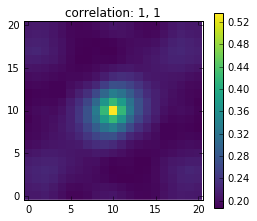

In [3]:
"""Plot an autocorrelation"""
sn = 0
cnum = 9
set_num = 1
pltcorr.pltcorr(ns_cal[set_num], set_id_cal[set_num], sn, cnum)

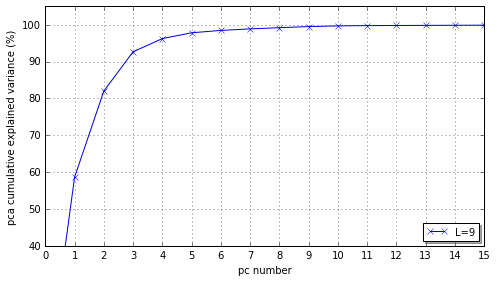

In [4]:
"""Perform PCA on correlations"""
pca = gns.new_space(ns_cal, set_id_cal)

"""transform statistics to reduced dimensionality space"""
f = h5py.File("spatial_reduced_L%s.hdf5" % C['H'], 'w')
f.close()

for ii in xrange(len(set_id_cal)):
    tf.transform(ns_cal[ii], set_id_cal[ii], pca)
for ii in xrange(len(set_id_val)):
    tf.transform(ns_val[ii], set_id_val[ii], pca)

"""Plot the percentage explained variance"""
%matplotlib inline
pev.variance([0, 15, 40, 105], Hvec)

In [ ]:
"""Plot the microstructures in PC space"""
pcA = 0
pcB = 1
pcC = 2

pltmap3d.pltmap(9, pcA, pcB, pcC)

In [ ]:
%matplotlib inline

"""Plot a dendrogram"""
pd.pltdend(ns_val, set_id_val, names_val, 9)

In [ ]:
"""get the data for the linkage"""

f = h5py.File("responses.hdf5", 'w')
f.close()

bc = 'bc1'

for ii in xrange(len(set_id_cal)):
    gr.resp(ns_cal[ii], strt_cal[ii], names_cal[ii],
            set_id_cal[ii], bc, C['dir_resp'])
for ii in xrange(len(set_id_val)):
    gr.resp(ns_val[ii], strt_val[ii], names_val[ii],
            set_id_val[ii], bc, C['dir_resp'])

In [ ]:
"""create the specified array of linkages and cross validate"""

f = h5py.File("regression_results_L%s.hdf5" % C['H'], 'w')
f.close()

gl.linkage('modulus')
gl.linkage('strength')

In [ ]:
"""Plot the errors versus number of PCs and polynomial order"""
%matplotlib inline
ppp.pltpcpoly('modulus', 30, 2, Hvec)
ppp.pltpcpoly('strength', 30, 4, Hvec)

In [ ]:
"""Plot the predicted versus actual values of the property of interest"""
%matplotlib inline
plc.plot_check('modulus', n_pc=30, n_poly=2, H=9)
plc.plot_check('strength', n_pc=30, n_poly=2, H=9)